***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python Kinetics Code}}$$<br>
$\mathbf{\text{Date:11/23}}$<br>
***

# KINETICS
***
$\mathbf{\text{Micro Kinetic Model for (a Simple 4-Step Mechanism) CO Oxidation}}:$<br>
#### [Link to Relevant Paper](https://pubs.acs.org/doi/10.1021/cs500377j) 

Rxn 1:&emsp;   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $ CO(g) + * \rightleftharpoons CO^{*} $  <br> 

Rxn 2:&emsp;   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {O_2}(g) + * \rightleftharpoons {O_2}^{*} $  <br> 

Rxn 3:&emsp;   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {O_2}^* + * \rightleftharpoons 2{O}^* $  <br> 

Rxn 4:&emsp;   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {CO}^{*} + {O}^{*} \rightleftharpoons {{CO}_2}^* + * $  <br> 

Rxn 5:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {CO}^{*} + {O_2}^{*} \rightleftharpoons {{CO}_2}^* + O^* $  <br> 

Rxn 6:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {CO_2}^{*} \rightleftharpoons {{CO}_2}(g) + * $  <br> 

---------------------------------
Rxn 7:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {NO}{(g)} + *\rightleftharpoons {{NO}^*} $  <br> 

Rxn 8:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {NO}^*  + {O}^* \rightleftharpoons {{{NO}_2}^*} + *$  <br> 

Rxn 9:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {NO}^*  + {O_2}^* \rightleftharpoons {{{NO}_2}^*} + O^*$  <br> 

Rxn 10:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {{{NO}_2}^*} + *\rightleftharpoons {NO}{(g)} + * $  <br> 

---------------------------------

***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$


Rate Equations (CO Oxidation):&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \theta_{{CO}_2} \cdot \theta_{*} $$

$$r_5 = k_{5}^f \cdot \theta_{CO} \cdot \theta_{O_2} - k_{5}^r \cdot \theta_{{CO}_2} \cdot \theta_{O} $$

$$r_6 = k_{6}^f \cdot \theta_{{CO}_2}  - k_{6}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*} $$



Rate Equations (NO Oxidation):&emsp;

$$r_7 = k_{7}^f \cdot \textrm{P}_{NO} \cdot \theta_{*} - k_{7}^r \cdot \theta_{NO} $$

$$r_8 = k_{8}^f \cdot \theta_{NO} \cdot \theta_{O} - k_{8}^r \cdot \theta_{{NO}_2}\cdot  \theta_{*} $$

$$r_9 = k_{9}^f \cdot \theta_{NO} \cdot \theta_{O_2} - k_{9}^r \cdot \theta_{{NO}_2} \cdot \theta_{O} $$

$$r_{10} = k_{10}^f \cdot \theta_{{NO}_2} - k_{10}^r \cdot \textrm{P}_{{NO}_2} \cdot \theta_{*} $$





In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [31]:
class PFR:
    def __init__(self):
        ######PFR Modelling
        self.Total_Volume = 1.0  #L
        self.Total_Pressure = 1.0 #atm
        self.Total_Flowrate = 658137 #*(1/3600) ## Total Flowrate L/s (GHSV * Cat.Vol) * (Convertion to per s)
        self.Volume_Step = 0.01 #Optional
        self.Volume = np.arange(0, self.Total_Volume+self.Volume_Step, self.Volume_Step, dtype=float) #Volume array #Can be customized #mandatory


        #Catalyst Info
        ##Site Densities: Pt/Pd Pd/Cu Pt/Cu Cu Only : 52 103 103 154 umol/g
        self.Site_density = 5e-6 #moles of sites/gram of catalyst
        self.Catalyst_gram =  0.14*(1000)*self.Total_Volume # mg/L -> grams
        #0.14 grams of catalyst per mililitre of reactor. #GHSV
        #NA = 6.022e23 #Avogadro's number (no. of molecules in a mole)
        
        self.T0 = 150 #degrees Celsius
        
        ##Feed Info
        self.Feed_Mol_pcnt = [0.000511, 0.1019,0 , 0.0002, 0] 
        #CO | O2 | CO2 | NO | NO2 | H2O #assume rest is inert if not balanced (i.e add up to 100%)

        self.Feed_Partial_Pressures = np.array(self.Feed_Mol_pcnt)  * self.Total_Pressure
        self.PCO,self.PO2,self.PCO2,self.PNO,self.PNO2 = list(self.Feed_Partial_Pressures)
        self.Feed_mol_frac = self.Feed_Partial_Pressures/self.Total_Pressure

        self.F_rate = self.Feed_mol_frac * self.Total_Flowrate * (1/22.4) #Initial Flowrate L/h -> mol/hr
        self.scale =22.00


        self.k1f = 135
        self.k1r = 1
        self.k2f = 169
        self.k2r = 1
        self.k3f = 91
        self.k3r = 1
        self.k4f = 1247
        self.k4r = 12.467
        self.k5f = 1247
        self.k5r = 12.467
        self.k6f = 91
        self.k6r = 1
        self.k7f = 151
        self.k7r = 1
        self.k8f = 31
        self.k8r = 0.5
        self.k9f = 31
        self.k9r = 0.5
        self.k10f = 91
        self.k10r = 1

        self.Rate_constants = np.array([self.k1f,self.k1r,self.k2f,self.k2r,self.k3f,
                                        self.k3r,self.k4f,self.k4r,self.k5f,self.k5r,self.k6f,
                                        self.k6r,self.k7f,self.k7r,self.k8f,self.k8r,self.k9f,
                                        self.k9r,self.k10f,self.k10r])

        self.K1 = self.k1f/self.k1r
        self.K2 = self.k2f/self.k2r
        self.K3 = self.k3f/self.k3r
        self.K4 = self.k4f/self.k4r
        self.K5 = self.k5f/self.k5r
        self.K6 = self.k6f/self.k6r
        self.K7 = self.k7f/self.k7r
        self.K8 = self.k8f/self.k8r
        self.K9 = self.k9f/self.k9r
        self.K10 = self.k10f/self.k10r

        self.Equilibrium_constants = np.array([self.K1,self.K2,self.K3,self.K4,self.K5,
                                               self.K6,self.K7,self.K8,self.K9,self.K10])

        ##Steady State Rate of Reaction Calculations PSSA_PEA
        ###Rx1 : CO Oxidation
        self.Rx1_num = (self.k4f*self.K1*np.sqrt(self.K2*self.K3)*self.PCO*np.sqrt(self.PO2)) + \
                        (self.k5f*self.K1*self.K2*self.PCO*self.PO2) - (self.k4r*(1/self.K6)*self.PCO2) - \
                        (self.k5r*(1/self.K6)*np.sqrt(self.K2*self.K3)*np.sqrt(self.PO2)*self.PCO2)
        self.Rx1_denom = (1 + self.K1*self.PCO + self.K2*self.PO2 + np.sqrt(self.K2*self.K3*self.PO2)+ \
                          (1/self.K6) *self.PCO2)**2
        self.Rx1 = self.Rx1_num/self.Rx1_denom
        
        ###Rx2 : NO Oxidation
        self.Rx2_num = (self.k8f*self.K7*np.sqrt(self.K2*self.K3)*self.PNO*np.sqrt(self.PO2)) + \
                        (self.k9f*self.K7*self.K2*self.PNO*self.PO2) - (self.k8r*(1/self.K10)*self.PNO2) - \
                            (self.k9r*(1/self.K10)*np.sqrt(self.K2*self.K3)*np.sqrt(self.PO2)*self.PNO2)
        self.Rx2_denom = (1 + self.K7*self.PNO + self.K2*self.PO2 + np.sqrt(self.K2*self.K3*self.PO2) + \
                          (1/self.K10) *self.PNO2)**2
        self.Rx2 = self.Rx2_num/self.Rx2_denom
    
        #TO STORE
        self.Flow_array = np.zeros((len(self.Volume),len(self.Feed_Mol_pcnt)))
        self.Flow_array[0,:] = self.F_rate/self.scale
        self.Partial_Pressure = np.zeros((len(self.Volume),len(self.Feed_Mol_pcnt)))
        
        self.Partial_Pressure[0,:] = [self.PCO,self.PO2,self.PCO2,self.PNO,self.PNO2]
        self.Covgs = np.zeros((len(self.Volume),7))
        self.Rxs1 = np.zeros((len(self.Volume),1))
        self.Rxs2 = np.zeros((len(self.Volume),1))
        
        
    def solve(self):
        
        for i in np.arange(len(self.Volume)-1):
            self.del_V = np.abs(self.Volume[i+1] - self.Volume[i])

            ##Updating Coverages
            self.th_e = 1/(1+(self.K1*self.PCO)+(self.K2*self.PO2)+np.sqrt(self.K2*self.K3*self.PO2)+\
                           ((1/self.K6)*self.PCO2)+(self.K7*self.PNO)+(self.PNO2/self.K10))
            self.th_CO = self.K1*self.PCO*self.th_e
            self.th_O2 = self.K2*self.PO2*self.th_e
            self.th_O = np.sqrt(self.K2*self.K3*self.PO2)*self.th_e
            self.th_CO2 = (1/self.K6) * self.PCO2 * self.th_e
            self.th_NO = self.K7*self.PNO*self.th_e
            self.th_NO2 = (1/self.K10)*self.PNO2*self.th_e
            
            self.Covgs[i,:] = [self.th_e,self.th_CO,self.th_O2,self.th_O,self.th_CO2,self.th_NO,self.th_NO2] 

            ##Updating Rate
            ##Steady State Rate of Reaction Calculations PSSA_PEA
            ###Rx1 : CO Oxidation
            self.Rx1_num = (self.k4f*self.K1*np.sqrt(self.K2*self.K3)*self.PCO*np.sqrt(self.PO2)) + \
                        (self.k5f*self.K1*self.K2*self.PCO*self.PO2) - (self.k4r*(1/self.K6)*self.PCO2) - \
                        (self.k5r*(1/self.K6)*np.sqrt(self.K2*self.K3)*np.sqrt(self.PO2)*self.PCO2)
            
            ###Rx2 : NO Oxidation
            self.Rx2_num = (self.k8f*self.K7*np.sqrt(self.K2*self.K3)*self.PNO*np.sqrt(self.PO2)) + \
                            (self.k9f*self.K7*self.K2*self.PNO*self.PO2) - (self.k8r*(1/self.K10)*self.PNO2) - \
                                (self.k9r*(1/self.K10)*np.sqrt(self.K2*self.K3)*np.sqrt(self.PO2)*self.PNO2)
            self.Rx1_cal = self.Rx1_num*((self.th_e)**2)
            self.Rx2_cal = self.Rx2_num*((self.th_e)**2)
            self.Rxs1[i] = self.Rx1_cal
            self.Rxs2[i] = self.Rx2_cal

            
            self.Flow_array[i+1,0] = self.Flow_array[i,0] - (self.Rx1_cal*self.del_V)  #CO
            self.Flow_array[i+1,1] = self.Flow_array[i,1] - ((self.Rx1_cal*0.5 + self.Rx2_cal*0.5) *self.del_V) #O2
            self.Flow_array[i+1,2] = self.Flow_array[i,2] + (self.Rx1_cal*self.del_V)  #CO2
            self.Flow_array[i+1,3] = self.Flow_array[i,3] - (self.Rx2_cal*self.del_V)  #NO
            self.Flow_array[i+1,4] = self.Flow_array[i,4] + (self.Rx2_cal*self.del_V)  #NO2

            self.Total_Flow = sum(self.Flow_array[i+1,:]) + 1198.5

            ##Updating Partial Pressures
            self.PCO = (self.Flow_array[i+1,0]/self.Total_Flow)*self.Total_Pressure
            self.PO2 = (self.Flow_array[i+1,1]/self.Total_Flow)*self.Total_Pressure
            self.PCO2 = (self.Flow_array[i+1,2]/self.Total_Flow)*self.Total_Pressure
            self.PNO = (self.Flow_array[i+1,3]/self.Total_Flow)*self.Total_Pressure
            self.PNO2 = (self.Flow_array[i+1,4]/self.Total_Flow)*self.Total_Pressure

            self.F_rate = self.Flow_array[i+1,:]
            
            self.Partial_Pressure[i+1,:] = [self.PCO,self.PO2,self.PCO2,self.PNO,self.PNO2]
        return self.Flow_array

    def outlet(self):
        out_flow = self.solve()


In [32]:
model = PFR()
soln = model.solve()

In [33]:
model.Rxs1

array([[1.457357  ],
       [1.42634715],
       [1.39600465],
       [1.36630261],
       [1.33722773],
       [1.30876697],
       [1.28090754],
       [1.25363693],
       [1.22694287],
       [1.20081335],
       [1.17523657],
       [1.15020101],
       [1.12569536],
       [1.10170856],
       [1.07822974],
       [1.05524829],
       [1.0327538 ],
       [1.01073606],
       [0.98918509],
       [0.9680911 ],
       [0.94744451],
       [0.92723594],
       [0.90745618],
       [0.88809623],
       [0.86914727],
       [0.85060066],
       [0.83244795],
       [0.81468083],
       [0.79729121],
       [0.78027112],
       [0.76361279],
       [0.74730859],
       [0.73135106],
       [0.71573289],
       [0.70044692],
       [0.68548613],
       [0.67084367],
       [0.65651282],
       [0.64248698],
       [0.62875973],
       [0.61532473],
       [0.60217582],
       [0.58930695],
       [0.57671219],
       [0.56438574],
       [0.55232192],
       [0.54051517],
       [0.528

In [34]:
(model.Flow_array[0,:])

array([  0.6824432 , 136.08798762,   0.        ,   0.26710106,
         0.        ])

In [23]:
%%time
model = PFR()
soln = model.solve()

CPU times: user 7.24 ms, sys: 193 µs, total: 7.43 ms
Wall time: 7.35 ms


In [35]:
sum(model.Covgs[1,:])

0.9999999999999999

In [ ]:
## Coverages

<IPython.core.display.Javascript object>


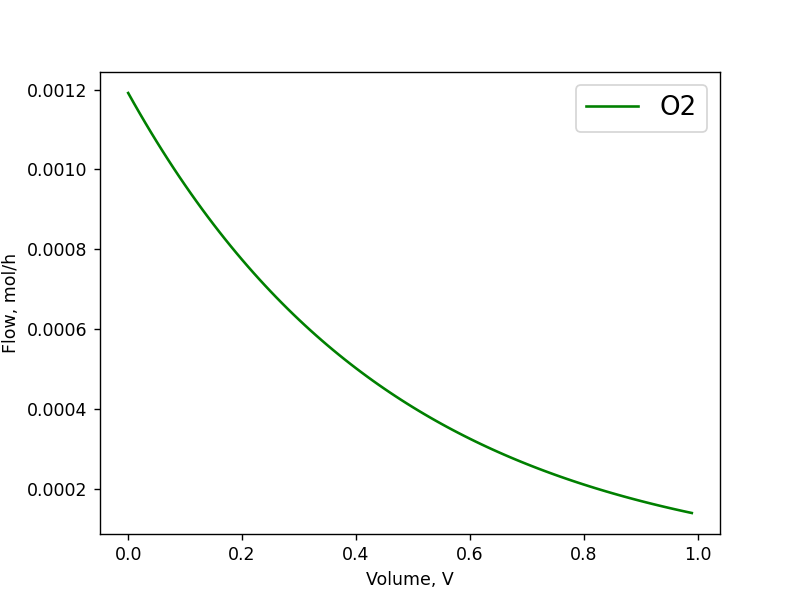

In [52]:
plt.figure()
plt.plot(model.Volume[0:-1], model.Covgs[0:-1,1], 'g-', label='O2') 

#plt.plot(Time, solv[:,3], label='4') 
plt.xlabel('Volume, V')
plt.ylabel("Flow, mol/h")
plt.legend(fontsize=15, loc='best')
plt.show()

In [ ]:
## Pressures

In [ ]:
plt.figure()
plt.plot(model.Volume[0:-1], model.Covgs[0:-1,1], 'g-', label='O2') 

#plt.plot(Time, solv[:,3], label='4') 
plt.xlabel('Volume, V')
plt.ylabel("Flow, mol/h")
plt.legend(fontsize=15, loc='best')
plt.show()

In [5]:
#### RELEVANT VARIABLES

T0 = 150 #degrees Celsius


PCO = 1e-8
PO2 = 1e-8 
PCO2 = 1e-8 
PNO = 1e-8
PNO2 = 1e-8

k1f = 2.00e+00
k1r = 6.65e-09
k2f = 2.31e+02
k2r = 1.15e+05
k3f = 6.13e+08
k3r = 2.14e-02
k4f = 2.85e-06
k4r = 5.00e+02
k5f = 2.00e+00
k5r = 6.65e-09
k6f = 2.31e+02
k6r = 1.15e+05
k7f = 6.13e+08
k7r = 2.14e-02
k8f = 2.85e-06
k8r = 5.00e+02
k9f = 2.00e+00
k9r = 6.65e-09
k10f = 2.31e+02
k10r = 1.15e+05

Rate_constants = np.array([k1f,k1r,k2f,k2r,k3f,k3r,k4f,k4r,k5f,k5r,k6f,k6r,k7f,k7r,k8f,k8r,k9f,k9r,k10f,k10r])

K1 = k1f/k1r
K2 = k2f/k2r
K3 = k3f/k3r
K4 = k4f/k4r
K5 = k5f/k5r
K6 = k6f/k6r
K7 = k7f/k7r
K8 = k8f/k8r
K9 = k9f/k9r
K10 = k10f/k10r

Equilibrium_constants = np.array([K1,K2,K3,K4,K5,K6,K7,K8,K9,K10])

In [6]:
##Steady State Rate of Reaction Calculations PSSA_PEA
###Rx1 : CO Oxidation
Rx1_num = (k4f*K1*np.sqrt(K2*K3)*PCO*np.sqrt(PO2)) + (k5f*K1*K2*PCO*PO2) - (k4r*(1/K6)*PCO2) - (k5r*(1/K6)*np.sqrt(K2*K3)*np.sqrt(PO2)*PCO2)
Rx1_denom = (1 + K1*PCO + K2*PO2 + np.sqrt(K2*K3*PO2) + (1/K6) *PCO2)**2
Rx1 = Rx1_num/Rx1_denom
###Rx2 : NO Oxidation
Rx2_num = (k8f*K7*np.sqrt(K2*K3)*PNO*np.sqrt(PO2)) + (k9f*K7*K2*PNO*PO2) - (k8r*(1/K10)*PNO2) - (k9r*(1/K10)*np.sqrt(K2*K3)*np.sqrt(PO2)*PNO2)
Rx2_denom = (1 + K7*PNO + K2*PO2 + np.sqrt(K2*K3*PO2) + (1/K10) *PNO2)**2
Rx2 = Rx2_num/Rx2_denom

In [10]:
######PFR Modelling
Total_Volume = 1.0  #L
Total_Pressure = 1.0 #atm
Total_Flowrate = 658137 #*(1/3600) ## Total Flowrate L/s (GHSV * Cat.Vol) * (Convertion to per s)
Volume_Step = 0.05 #Optional
Volume = np.arange(0, Total_Volume+Volume_Step, Volume_Step, dtype=float) #Volume array #Can be customized #mandatory


#Catalyst Info
##Site Densities: Pt/Pd Pd/Cu Pt/Cu Cu Only : 52 103 103 154 umol/g
Site_density = 5e-6 #moles of sites/gram of catalyst
Catalyst_gram =  0.14*(1000)*Total_Volume # mg/L -> grams
#0.14 grams of catalyst per mililitre of reactor. #GHSV
#NA = 6.022e23 #Avogadro's number (no. of molecules in a mole)

In [15]:
##Feed Info
Feed_Mol_pcnt = [0.000511,0 , 0.1019, 0.0002, 0] #CO | O2 | CO2 | NO | NO2 | H2O #assume rest is inert if not balanced (i.e add up to 100%)

Feed_Partial_Pressures = np.array(Feed_Mol_pcnt)  * Total_Pressure
Feed_mol_frac = Feed_Partial_Pressures/Total_Pressure

F_rate = Feed_mol_frac * Total_Flowrate * (1/22.4) #Initial Flowrate L/h -> mol/hr
Flow_array = np.empty((len(Volume),len(Feed_Mol_pcnt)))


In [16]:
F_rate

array([  15.01375031,    0.        , 2993.93572768,    0.        ,
          5.87622321])

In [ ]:
Flow_Rates[0,:] = F_rate

for i in np.arange(len(Volume)-1):
    del_V = np.abs(Volume[i+1] - Volume[i])
    
    ##Updating Coverages
    th_e = np.sqrt(Rx2_denom)
    th_CO = K1*PCO*th_e
    th_O2 = K2*PO2*th_e
    th_O = np.sqrt(K2*K3*PO2)*th_e
    th_CO2 = (1/K6) * PCO2 * th_e
    th_NO = K7*PNO*th_e
    th_NO2 = (1/K10)*PNO2*th_e
    
    ##Updating Rate
    Rx1_cal = Rx1_num/(th_e**2)
    Rx2_cal = Rx2_num/(th_e**2)
    
    
    Flow_array[i,:] = F_rate
    Flow_array[i+1,0] = Flow_array[i,0] - (Rx1_cal*del_V)  #CO
    Flow_array[i+1,1] = Flow_array[i,1] - ((Rx1_cal*0.5 + Rx2_cal*0.5) *del_V) #O2
    Flow_array[i+1,2] = Flow_array[i,2] + (Rx1_cal*del_V)  #CO2
    Flow_array[i+1,3] = Flow_array[i,3] - (Rx2_cal*del_V)  #NO
    Flow_array[i+1,4] = Flow_array[i,4] + (Rx2_cal*del_V)  #NO2
    
    Total_Flow = sum(Flow_array[i+1,:])
    
    ##Updating Partial Pressures
    PCO = (Flow_array[i+1,0]/Total_Flow)*Total_Pressure
    PO2 = (Flow_array[i+1,1]/Total_Flow)*Total_Pressure
    PCO2 = (Flow_array[i+1,2]/Total_Flow)*Total_Pressure
    PNO = (Flow_array[i+1,3]/Total_Flow)*Total_Pressure
    PNO2 = (Flow_array[i+1,4]/Total_Flow)*Total_Pressure
    
    F_rate = Flow_array[i+1,:]
    
    
    
   
    
    
    
    


In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np


def sol(t,u,k1f,k1r,k2f,k2r,k3f,k3r,k4f,k4r,P1,P2,P3):
    # 1 = CO ; 2 = O2 ; 3 = O ; 4 = *
    
    #Surface Coverage 
    th1 = u[0] #Theta_CO 
    th2 = u[1] #Theta_O
    th3 = u[2] #Theta_O2
    th4 = u[3] #Theta_*
    
    #Partial Pressures
    P1 #P_CO
    P2 #P_O2
    P3 #P_CO2

    #Rates of reaction
    r1 = k1f*P1*th4 - k1r*th1
    r2 = k2f*P2*th4 - k2r*th2
    r3 = k3f*th2*(th4) - k3r*(th3**2)
    r4 = k4f*th1*th3 - k4r*P3*(th4**2)


    #Rate of change of surface coverages
    D1 = r1-r4               #Rate of Formation of CO*
    D2 = r2-r3               #Rate of Formation of O_2*
    D3 = (2*r3)-r4           #Rate of Formation of O*
    D4 = (2*r4)-r3-r2-r1     #Rate of Formation of *
    
    return [D1,D2,D3,D4]

# CO ; O2 ; O ; *
init = [0,0,0,1]


P = 1e-8 # 1e-8 #bar
P1 = 1e-8 #P
P2 = 1e-8 #P
P3 = 1e-8 #P

k1f = 2.00e+00
k1r = 6.65e-09
k2f = 2.31e+02
k2r = 1.15e+05
k3f = 6.13e+08
k3r = 2.14e-02
k4f = 2.85e-06
k4r = 5.00e+02
k5f = 2.00e+00
k5r = 6.65e-09
k6f = 2.31e+02
k6r = 1.15e+05
k7f = 6.13e+08
k7r = 2.14e-02
k8f = 2.85e-06
k8r = 5.00e+02
k9f = 2.00e+00
k9r = 6.65e-09
k10f = 2.31e+02
k10r = 1.15e+05

Time =np.linspace(0, 6e6, num=1000)
t_span = (Time[0], Time[-1])
from scipy.integrate import odeint, solve_ivp
solve = solve_ivp(sol,t_span,init,args=(k1f,k1r,k2f,k2r,k3f,k3r,k4f,k4r,P1,P2,P3),method='BDF', rtol = 1E-6,atol = 1E-8)
solv = np.transpose(solve.y)
Time = np.transpose(solve.t)
print(k1f,k2f,k3f,k4f)
print(k1r,k2r,k3r,k4r)

2.0 231.0 613000000.0 2.85e-06
6.65e-09 115000.0 0.0214 500.0


<IPython.core.display.Javascript object>


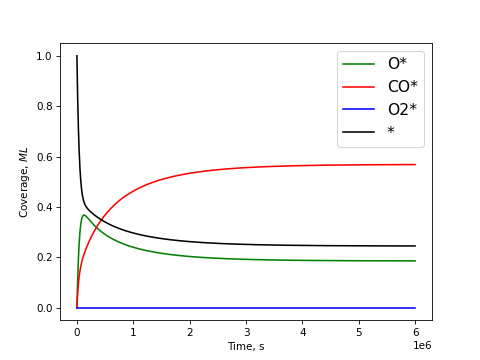

In [6]:
plt.plot(Time, solv[:,2], 'g-', label='O*') 
plt.plot(Time, solv[:,0],'r-', label='CO*')        
plt.plot(Time, solv[:,1],'b-', label='O2*') 
plt.plot(Time, solv[:,3],'k-', label='*') 

#plt.plot(Time, solv[:,3], label='4') 
plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.legend(fontsize=15, loc='best')
plt.show()